In [52]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)

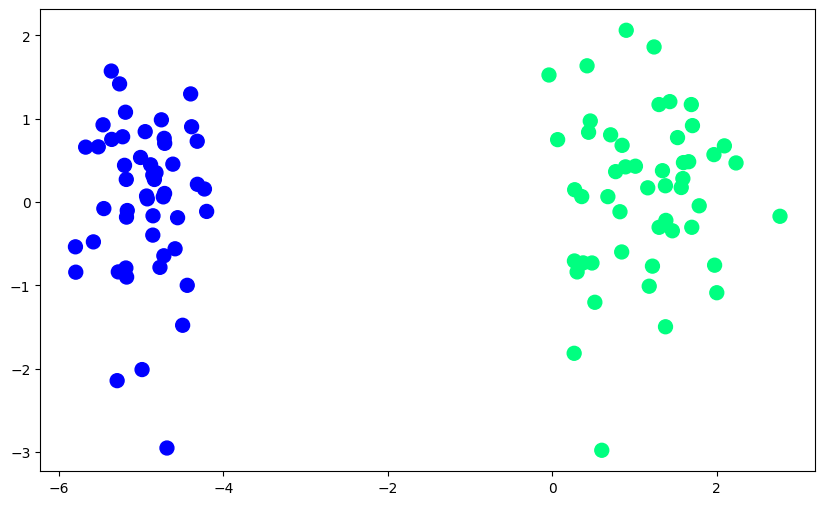

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [54]:
def step(z):
    return 1 if z > 0 else 0

def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
        
    return weights[0], weights[1:]
        

In [55]:
intercept_,coef_ = perceptron(X,y)
print(intercept_)
print(coef_)

1.2000000000000002
[1.1204053  0.40381514]


In [56]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

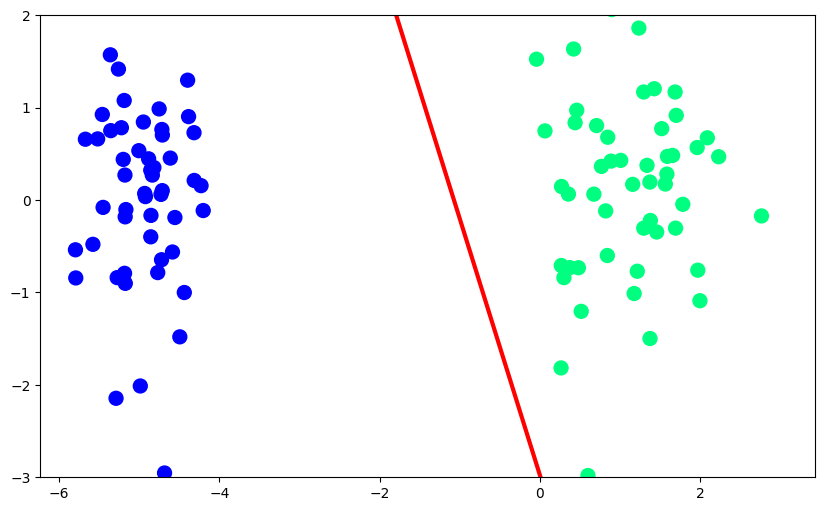

In [57]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [58]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def perceptron_sigmoid(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    j = np.random.randint(0,100)
    
    y_hat = sigmoid(np.dot(X[j],weights))
    weights = weights + lr*(y[j] - y_hat)*X[j]
    
    return weights[0], weights[1:]


In [59]:
intercept_,coef_ = perceptron_sigmoid(X,y)
m = -(coef_[0] / coef_[1])
b = -(intercept_ /coef_[1])



x_input_s = np.linspace(-3,3,100)
y_input_s = m*x_input + b

(-3.0, 2.0)

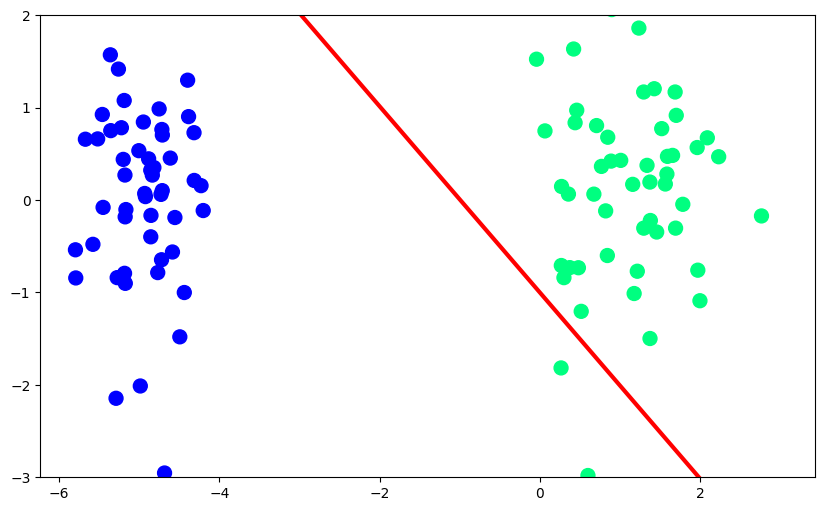

In [60]:
plt.figure(figsize=(10,6))
plt.plot(x_input_s,y_input_s,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [61]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_/ lor.coef_[0][1])

x_input_lor = np.linspace(-3,3,100)
y_input_lor = m*x_input + b

(-3.0, 2.0)

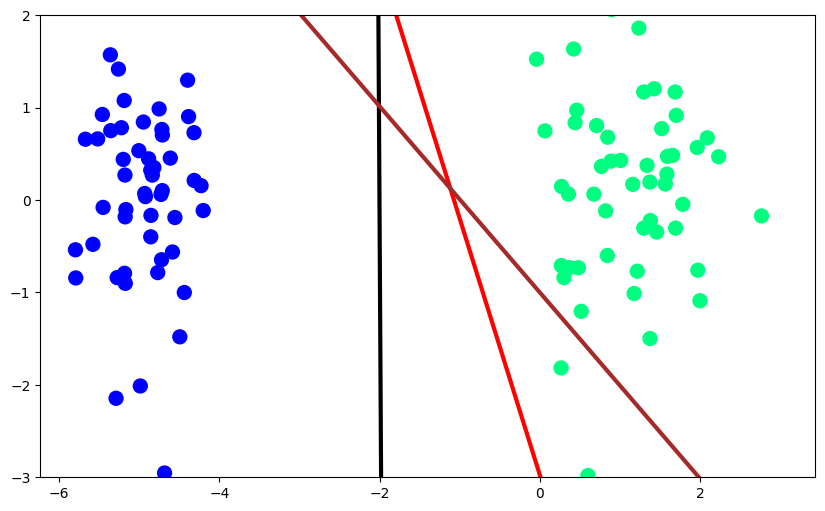

In [62]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input_lor,y_input_lor,color='black',linewidth=3)
plt.plot(x_input_s,y_input_s,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)